# Intra-Cluster Light (ICL) profiles analysis in the Dark Energy Survey (DES)




In [5]:
import healpy as hp
import numpy as np
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from healpy.rotator import Rotator
import kmeans_radec
from kmeans_radec import KMeans, kmeans_sample
import os
import os.path
import configparser
import sys
from astropy.table import Table

In [6]:
ini_file= 'redmapper_y1.ini'
config = configparser.ConfigParser()
inifile = config.read(ini_file)
input_dir_rdmp=config.get('input', 'input_dir')
catalog=config.get('input', 'catalog_file')
flag_files_rdmp=[ii.strip() for ii in config.get('input', 'flag_files').split(',')]
save_dir_rdmp=config.get('output', 'save_dir')
grid_output_dir_rdmp=config.get('grid_output', 'save_dir')
rdmp=pyfits.open(catalog)[1].data
flags_rdmp=np.zeros(len(rdmp))+1
indices_rdmp=np.arange(len(rdmp))

### ICL jacknife profiles subtraction

In [7]:
str_ngals = ['$\lambda$ = [20;30)',
             '$\lambda$ = [30;45)',
             '$\lambda$ = [45;60)',
             '$\lambda$ = [60;150)']
richness_dir = ['richness_20_30/',
                'richness_30_45/',
                'richness_45_60/',
                'richness_60_beyond/']

numflag = 0
flag = ['', '_scaled'][numflag]
flag

''

In [8]:
def luptonmags(flux, sigma_):
    ##########################
    ## computing luptitudes ##
    ##########################
    
    m0 = 30.
    f0 = 10.**(m0/2.5)

    a =  2.5*np.log10(np.e) #1.08574
    sigma = sigma_/f0
    b = np.sqrt(a)*sigma
    b_ = f0 * b

    x = flux/f0 

    #mu = (m0 - 2.5 * np.log10(b_)) - a * np.arcsinh(flux/ (2.*b_) )
    mu0 = (m0 - 2.5 * np.log10(b_)) - a * np.arcsinh(0/ (2.*b_) ) # for this eq. flux=0.
    mu = mu0 - a * np.arcsinh(flux/ (2.*b_) ) 
        
    var_mag_unc = ( (a)**2 * (sigma_)**2 ) / ( 4*(b_)**2 + (flux)**2) 
    mag_unc = np.sqrt( var_mag_unc )
    
    return mu, mag_unc
#mu, mag_unc = luptonmags(mea, std)
#plt.plot(r_red, mu, '-', lw=1.5,alpha=0.6,color=colors[i],label=str_ngals[i])
#plt.fill_between(r_red, mu + mag_unc, mu - mag_unc, color=colors[i], alpha=0.15, label='')

/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in greater
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


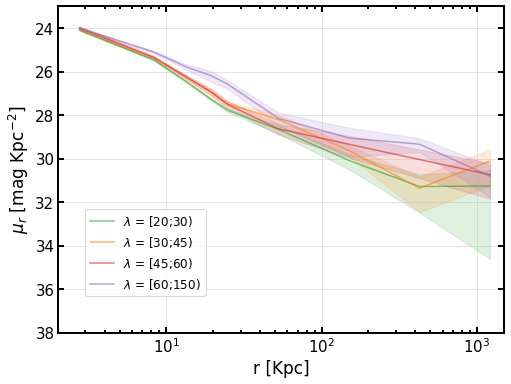

In [9]:
fig = plt.figure(figsize=(8,6))  
ax = plt.subplot()
plt.xscale('log')

plt.grid(alpha=0.4)


colors = ['C2','C1','C3','C4']


for i in range(4):
    
    
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_uprmem_unmasked.txt')
    r_red, mea, std = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up = mea+std
    low = mea-std
    
    mag0 = -2.5 * np.log10(0.1)
    mag = 30 - 2.5 * np.log10(mea)
    mag_up = 30 - 2.5 *np.log10(up)
    mag_low = 30 - 2.5 * np.log10(low)
    mask = (mag_low>-30000)
    
    
    plt.plot(r_red[mask], mag[mask], '-', lw=1.5,alpha=0.6,color=colors[i],label=str_ngals[i])
    plt.fill_between(r_red[mask], mag_up[mask], mag_low[mask], color=colors[i], alpha=0.15, label='')

plt.ylabel('$\mu_{r}$ [mag Kpc$^{-2}$]', fontsize=17)
plt.xlabel('r [Kpc]', fontsize=17)
plt.xticks(fontsize = 0)
plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylim(38,23)
plt.xlim(2,1500)
[ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0)
    
plt.legend(bbox_to_anchor=(0.06, 0.38), loc=2, fontsize=12,borderaxespad=0.,numpoints=1,scatterpoints=1)

plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


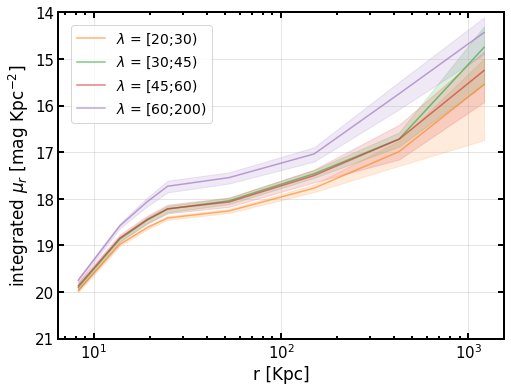

In [8]:
from matplotlib import gridspec
fig = plt.figure(figsize=(8,6))  
ax = plt.subplot()
plt.xscale('log')

plt.grid(alpha=0.4)


colors = ['C2','C1','C3','C4']


for i in range(4):
    
    
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_uprmem_unmasked.txt')
    r_red, mea, std = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up = mea+std
    low = mea-std
    
    mag = 30 - 2.5 * np.log10(mea)
    mag_up = 30 - 2.5 *np.log10(up)
    mag_low = 30 - 2.5 * np.log10(low)
    mask = (mag_low>-30000)
    
    
    plt.plot(r_red[mask ], mag[mask ], '-', lw=1.5,alpha=0.6,color=colors[i],label=str_ngals[i])
    plt.fill_between(r_red[mask ], mag_up[mask ], mag_low[mask ], color=colors[i], alpha=0.15, label='')

plt.ylabel('integrated $\mu_{r}$ [mag Kpc$^{-2}$]', fontsize=17)
plt.xlabel('r [Kpc]', fontsize=17)
plt.xticks(fontsize = 0)
plt.ylim(21,14)
#plt.xlim(6,1100)
plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=1.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=13.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
[ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0)
    
plt.legend(bbox_to_anchor=(0.03, 0.96), loc=2, fontsize=14,borderaxespad=0.,numpoints=1,scatterpoints=1)

plt.show()
##############################################################################

### CENT RMEM clusters

/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in greater
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


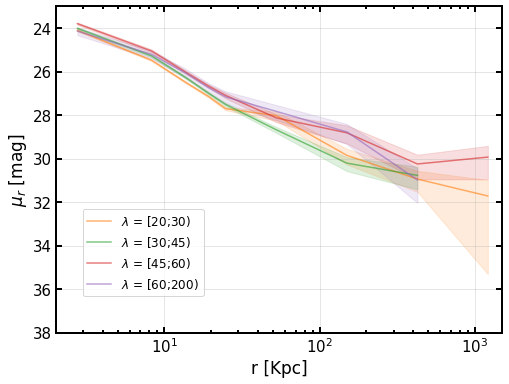

In [13]:

fig = plt.figure(figsize=(8,6))  
ax = plt.subplot()
plt.xscale('log')

plt.grid(alpha=0.4)


colors = ['C2','C1','C3','C4']


for i in range(4):
    
    
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_cenrmem_unmasked.txt')
    r_red, mea, std = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up = mea+std
    low = mea-std
    
    mag0 = -2.5 * np.log10(0.1)
    mag = 30 - 2.5 * np.log10(mea)
    mag_up = 30 - 2.5 *np.log10(up)
    mag_low = 30 - 2.5 * np.log10(low)
    mask = (mag_low>-30000)
    
    
    plt.plot(r_red[mask], mag[mask], '-', lw=1.5,alpha=0.6,color=colors[i],label=str_ngals[i])
    plt.fill_between(r_red[mask], mag_up[mask], mag_low[mask], color=colors[i], alpha=0.15, label='')

plt.ylabel('$\mu_{r}$ [mag]', fontsize=17)
plt.xlabel('r [Kpc]', fontsize=17)
plt.xticks(fontsize = 0)
plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylim(38,23)
plt.xlim(2,1500)
[ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0)
    
plt.legend(bbox_to_anchor=(0.06, 0.38), loc=2, fontsize=12,borderaxespad=0.,numpoints=1,scatterpoints=1)

plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in greater
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


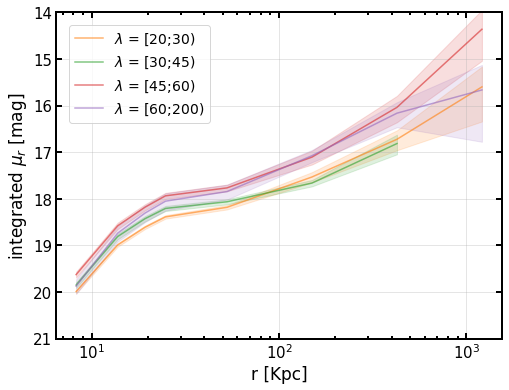

In [15]:
from matplotlib import gridspec
fig = plt.figure(figsize=(8,6))  
ax = plt.subplot()
plt.xscale('log')

plt.grid(alpha=0.4)


colors = ['C2','C1','C3','C4']


for i in range(4):
    
    
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_cenrmem_unmasked.txt')
    r_red, mea, std = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up = mea+std
    low = mea-std
    
    mag = 30 - 2.5 * np.log10(mea)
    mag_up = 30 - 2.5 *np.log10(up)
    mag_low = 30 - 2.5 * np.log10(low)
    mask = (mag_low>-30000)
    
    
    plt.plot(r_red[mask ], mag[mask ], '-', lw=1.5,alpha=0.6,color=colors[i],label=str_ngals[i])
    plt.fill_between(r_red[mask ], mag_up[mask ], mag_low[mask ], color=colors[i], alpha=0.15, label='')

plt.ylabel('integrated $\mu_{r}$ [mag]', fontsize=17)
plt.xlabel('r [Kpc]', fontsize=17)
plt.xticks(fontsize = 0)
plt.ylim(21,14)
#plt.xlim(6,1100)
plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=1.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=13.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
[ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0)
    
plt.legend(bbox_to_anchor=(0.03, 0.96), loc=2, fontsize=14,borderaxespad=0.,numpoints=1,scatterpoints=1)

plt.show()
##############################################################################

### SMALL RMEM clusters

/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in greater
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


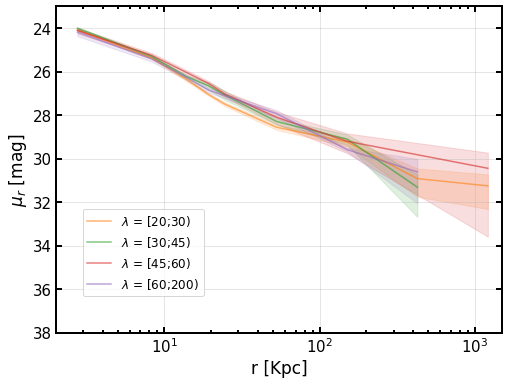

In [21]:

fig = plt.figure(figsize=(8,6))  
ax = plt.subplot()
plt.xscale('log')

plt.grid(alpha=0.4)


colors = ['C2','C1','C3','C4']


for i in range(4):
    
    
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    jacknife_profile=np.loadtxt(dir_ind+'sub_moments_lowrmem_unmasked.txt')
    r_red, mea, std = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up = mea+std
    low = mea-std
    
    mag0 = -2.5 * np.log10(0.1)
    mag = 30 - 2.5 * np.log10(mea)
    mag_up = 30 - 2.5 *np.log10(up)
    mag_low = 30 - 2.5 * np.log10(low)
    mask = (mag_low>-30000)
    
    
    plt.plot(r_red[mask], mag[mask], '-', lw=1.5,alpha=0.6,color=colors[i],label=str_ngals[i])
    plt.fill_between(r_red[mask], mag_up[mask], mag_low[mask], color=colors[i], alpha=0.15, label='')

plt.ylabel('$\mu_{r}$ [mag]', fontsize=17)
plt.xlabel('r [Kpc]', fontsize=17)
plt.xticks(fontsize = 0)
plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=0.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylim(38,23)
plt.xlim(2,1500)
[ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0)
    
plt.legend(bbox_to_anchor=(0.06, 0.38), loc=2, fontsize=12,borderaxespad=0.,numpoints=1,scatterpoints=1)

plt.show()
##############################################################################

/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in greater
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


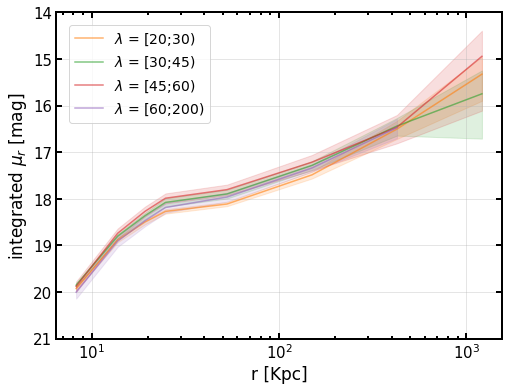

In [23]:
from matplotlib import gridspec
fig = plt.figure(figsize=(8,6))  
ax = plt.subplot()
plt.xscale('log')

plt.grid(alpha=0.4)


colors = ['C2','C1','C3','C4']


for i in range(4):
    
    
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_lowrmem_unmasked.txt')
    r_red, mea, std = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    up = mea+std
    low = mea-std
    
    mag = 30 - 2.5 * np.log10(mea)
    mag_up = 30 - 2.5 *np.log10(up)
    mag_low = 30 - 2.5 * np.log10(low)
    mask = (mag_low>-30000)
    
    
    plt.plot(r_red[mask ], mag[mask ], '-', lw=1.5,alpha=0.6,color=colors[i],label=str_ngals[i])
    plt.fill_between(r_red[mask ], mag_up[mask ], mag_low[mask ], color=colors[i], alpha=0.15, label='')

plt.ylabel('integrated $\mu_{r}$ [mag]', fontsize=17)
plt.xlabel('r [Kpc]', fontsize=17)
plt.xticks(fontsize = 0)
plt.ylim(21,14)
#plt.xlim(6,1100)
plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=1.,
               bottom='on', top='on', left='on', right ='on')
plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=13.,
               bottom='on', top='on', left='on', right ='on')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
[ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
plt.subplots_adjust(wspace=0, hspace=0)
    
plt.legend(bbox_to_anchor=(0.03, 0.96), loc=2, fontsize=14,borderaxespad=0.,numpoints=1,scatterpoints=1)

plt.show()
##############################################################################

### Comparison between UP and LOW rmem

/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/home/hillysson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/hillysson/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a

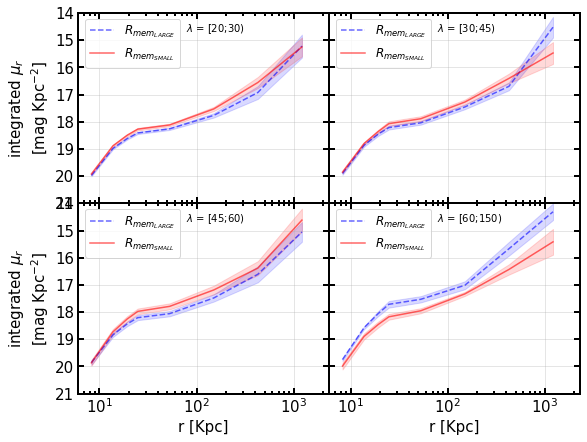

In [11]:

fig = plt.figure(figsize=(9,7))  


for i in range(4):
    
    ax = plt.subplot(2,2,i+1)
    plt.xscale('log')
    #plt.yscale('log')
    plt.grid(alpha=0.4)
    
    ngal_bins=i+1
    richness_dir = ['richness_20_30/',
                    'richness_30_45/',
                    'richness_45_60/',
                    'richness_60_beyond/']
    dir_sub=save_dir_rdmp+'subtracted_profiles/'+richness_dir[ngal_bins-1]
    
    
    dir_ind=save_dir_rdmp+'redmapper_y1_jacknife_sub_profiles/'+richness_dir[ngal_bins-1]
    
   
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_uprmem_unmasked.txt')
    r_red0, mea0, std0 = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    mu0, mag_unc0 = luptonmags(mea0, std0)

    plt.plot(r_red0, mu0, '--', lw=1.5,alpha=0.6,color='blue',label='$R_{mem_{LARGE}}$')
    plt.fill_between(r_red0, mu0 + mag_unc0, mu0 - mag_unc0, color='blue', alpha=0.15, label='')
    
    
    
    jacknife_profile=np.loadtxt(dir_ind+'int_moments_lowrmem_unmasked.txt')
    r_red, mea, std = jacknife_profile.T[0], jacknife_profile.T[1], jacknife_profile.T[2]
    
    mu, mag_unc = luptonmags(mea, std)

    plt.plot(r_red, mu, '-', lw=1.5,alpha=0.6,color='red',label='$R_{mem_{SMALL}}$')
    plt.fill_between(r_red, mu + mag_unc, mu - mag_unc, color='red', alpha=0.15, label='')


    plt.ylim(21,14)
    plt.xlim(6, 2.3e3)
    plt.tick_params(direction='in',which='major', length=6, width=2, labelsize=1.,
                   bottom='on', top='on', left='on', right ='on')
    plt.tick_params(direction='in',which='minor', length=3, width=2, labelsize=13.,
                   bottom='on', top='on', left='on', right ='on')
    plt.yticks(fontsize=0)
    plt.xticks(fontsize=0)
    [ax.spines[axis].set_linewidth(2.) for axis in ['top','bottom','left','right']]
    plt.subplots_adjust(wspace=0, hspace=0)
    
    plt.legend(bbox_to_anchor=(0.03, 0.97),  loc=2, fontsize=12,borderaxespad=0.,
               numpoints=1,scatterpoints=1)
    
    plt.annotate(str_ngals[i],
                 xy=(0.43,0.9),xycoords='axes fraction',
                 fontsize=10)


plt.subplot(2,2,1)  
plt.ylabel('integrated $\mu_{r}$ \n'+'[mag Kpc$^{-2}$]', fontsize=15)
plt.yticks(fontsize = 15)

plt.subplot(2,2,3)  
plt.xlabel('r [Kpc]', fontsize=15)
plt.ylabel('integrated $\mu_{r}$ \n'+'[mag Kpc$^{-2}$]', fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.subplot(2,2,4)  
plt.xlabel('r [Kpc]', fontsize=15) 
plt.xticks(fontsize = 15)
    
plt.show()
##############################################################################